In [1]:
import pandas as pd
from collections import defaultdict

In [2]:
import os

if not os.path.exists('transformed'):
    os.makedirs('transformed')

In [3]:
dataset=pd.read_csv('ShubmanGill-IPL.csv')

In [4]:
allviews=[]

In [5]:
mapping=defaultdict(set)
for index,row in dataset.iterrows():
    if row['p_bat'] not in mapping:
        mapping[row['bat']].add(row['p_bat'])

In [6]:
mapping

defaultdict(set,
            {'Shubman Gill': {1070173},
             'Andre Russell': {276298},
             'Eoin Morgan': {24598}})

In [7]:
def bowl_categoryfunc(bowl_type):
#     print(bowl_type)
    if bowl_type in ['RFM','RM','RMF','RF']:
        ans='RAP'
    elif bowl_type in ['LFM','LM','LMF','LF']:
        ans='LAP'
    elif bowl_type =='OB/LB':
        ans='RAS'
    elif bowl_type=='SLA/LWS':
        ans='LAS'
    elif bowl_type in ['LB','LBG']:
        ans='RWS'
    elif bowl_type=='SLA':
        ans='SLA'
    elif bowl_type=='OB':
        ans='RAO'
    elif bowl_type=='LWS':
        ans='LWS'
    return ans

In [8]:
calculate={
#     'inns_number':'first',
#     'team':'first',
    'runs':'sum',
    'balls':'sum',
    'outs':'sum',
    'bowler_dismissed?':'sum',
    'dots':'sum',
    '1s':'sum',
    '2s':'sum',
    '3s':'sum',
    '4s':'sum',
    '5s':'sum',
    '6s':'sum',
#     'opposition':'first',
    'control':'sum'
#     'ground':'first',
#     'date':'first'
}

In [9]:
fullview={
    'inns_number':'first',
    'team':'first',
    'runs':'sum',
    'balls':'sum',
    'outs':'sum',
    'bowler_dismissed?':'sum',
    'dots':'sum',
    '1s':'sum',
    '2s':'sum',
    '3s':'sum',
    '4s':'sum',
    '5s':'sum',
    '6s':'sum',
    'opposition':'first',
    'control':'sum',
    'ground':'first'
}

In [10]:
dataset.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [11]:
dataset['control']=dataset['control'].fillna(0)

In [12]:
dataset.drop_duplicates(inplace=True)

In [13]:
dataset.dtypes

p_match             int64
inns                int64
bat                object
p_bat               int64
team_bat           object
bowl               object
p_bowl              int64
team_bowl          object
ball                int64
ball_id           float64
outcome            object
score               int64
out                  bool
dismissal          object
p_out               int64
over                int64
noball              int64
wide                int64
byes                int64
legbyes             int64
cur_bat_runs        int64
cur_bat_bf          int64
cur_bowl_ovr      float64
cur_bowl_wkts       int64
cur_bowl_runs       int64
inns_runs           int64
inns_wkts           int64
inns_balls          int64
inns_runs_rem     float64
inns_balls_rem      int64
inns_rr           float64
inns_rrr          float64
target            float64
max_balls           int64
date               object
year                int64
ground             object
country            object
winner      

In [14]:
dataset['batruns']=dataset['batruns'].apply(lambda x: int(x))
dataset['ballfaced']=dataset['ballfaced'].apply(lambda x: int(x))
dataset['bowl_category']=dataset['bowl_style'].apply(bowl_categoryfunc)
# dataset['runout']=False

In [15]:
dataset.dtypes

p_match             int64
inns                int64
bat                object
p_bat               int64
team_bat           object
bowl               object
p_bowl              int64
team_bowl          object
ball                int64
ball_id           float64
outcome            object
score               int64
out                  bool
dismissal          object
p_out               int64
over                int64
noball              int64
wide                int64
byes                int64
legbyes             int64
cur_bat_runs        int64
cur_bat_bf          int64
cur_bowl_ovr      float64
cur_bowl_wkts       int64
cur_bowl_runs       int64
inns_runs           int64
inns_wkts           int64
inns_balls          int64
inns_runs_rem     float64
inns_balls_rem      int64
inns_rr           float64
inns_rrr          float64
target            float64
max_balls           int64
date               object
year                int64
ground             object
country            object
winner      

In [16]:
def phasecalc(m):
    if 1<=m<=6:
        return 'PP'
    elif 7<=m<=16:
        return 'Middle'
    elif 17<=m<=20:
        return 'Slog'

dataset['phase']=dataset['over'].apply(phasecalc)

In [17]:
modify=dataset[dataset['bat']!='Shubman Gill']
modify

,p_match,inns,bat,p_bat,team_bat,bowl,p_bowl,team_bowl,ball,ball_id,...,wagonY,wagonZone,line,length,shot,control,predscore,wprob,bowl_category,phase
455,1136586,2,Andre Russell,276298,Kolkata Knight Riders,Amit Mishra,31107,Delhi Capitals,3,15.03,...,138,7,OUTSIDE_OFFSTUMP,GOOD_LENGTH,CUT_SHOT,1.0,181,0.21,RWS,Middle
1021,1216540,2,Eoin Morgan,24598,Kolkata Knight Riders,Washington Sundar,719715,Royal Challengers Bangalore,3,9.03,...,167,3,OUTSIDE_OFFSTUMP,FULL,DEFENDED,0.0,154,3.29,RAO,Middle


In [18]:
dataset.loc[modify.index,'bat']='Shubman Gill'
dataset.loc[modify.index,'batruns']=0
dataset.loc[modify.index,'ballfaced']=0
dataset.loc[modify.index,'bat_hand']='RHB'
dataset.loc[modify.index,'control']=0

In [19]:
runoutdis=dataset[dataset['dismissal']=='run out']

In [20]:
for index,row in runoutdis.iterrows():
    if row['p_out']==int(str(mapping[row['bat']])[1:-1]):
        runoutdis.loc[index, 'out'] = True
    else:
        runoutdis.loc[index, 'out'] = False

In [21]:
# runoutdis['runout']=runoutdis['out']
# runoutdis['out']=False
dataset.update(runoutdis)

In [22]:
reqcols=['inns','bat','team_bat','bowl','team_bowl','ball','ball_id','out','dismissal','over','phase','noball','wide','date','year','ground','country','bat_hand','bowl_style','bowl_kind','bowl_category','batruns','ballfaced','line','length','shot','control']
dataset=dataset[reqcols]

In [23]:
dataset.rename(columns={'inns':'inns_number','batruns':'runs','ballfaced':'balls','team_bowl':'opposition','team_bat':'team','out':'outs'},inplace=True)

In [24]:
dataset['inns']=1

In [25]:
dataset.duplicated().sum()

0

In [26]:
dataset.isnull().sum()

inns_number         0
bat                 0
team                0
bowl                0
opposition          0
ball                0
ball_id             0
outs                0
dismissal        2346
over                0
phase               0
noball              0
wide                0
date                0
year                0
ground              0
country             0
bat_hand            0
bowl_style          0
bowl_kind           0
bowl_category       0
runs                0
balls               0
line                7
length              7
shot                2
control             0
inns                0
dtype: int64

In [27]:
dataset['1s']=dataset['runs'].apply(lambda x: 1 if x==1 else 0)
dataset['2s']=dataset['runs'].apply(lambda x: 1 if x==2 else 0)
dataset['3s']=dataset['runs'].apply(lambda x: 1 if x==3 else 0)
dataset['4s']=dataset['runs'].apply(lambda x: 1 if x==4 else 0)
dataset['5s']=dataset['runs'].apply(lambda x: 1 if x==5 else 0)
dataset['6s']=dataset['runs'].apply(lambda x: 1 if x==6 else 0)

In [28]:
dataset

,inns_number,bat,team,bowl,opposition,ball,ball_id,outs,dismissal,over,...,length,shot,control,inns,1s,2s,3s,4s,5s,6s
0,1.0,Shubman Gill,Kolkata Knight Riders,Lasith Malinga,Mumbai Indians,1.0,2.01,False,NaN,3.0,...,FULL,PUSH,1.0,1,1,0,0,0,0,0
1,1.0,Shubman Gill,Kolkata Knight Riders,Lasith Malinga,Mumbai Indians,4.0,2.04,False,NaN,3.0,...,FULL,ON_DRIVE,1.0,1,0,0,0,0,0,0
2,1.0,Shubman Gill,Kolkata Knight Riders,Lasith Malinga,Mumbai Indians,5.0,2.05,False,NaN,3.0,...,GOOD_LENGTH,FLICK,1.0,1,0,0,0,0,0,0
3,1.0,Shubman Gill,Kolkata Knight Riders,Lasith Malinga,Mumbai Indians,6.0,2.06,False,NaN,3.0,...,FULL,COVER_DRIVE,1.0,1,1,0,0,0,0,0
4,1.0,Shubman Gill,Kolkata Knight Riders,Lasith Malinga,Mumbai Indians,1.0,5.01,False,NaN,6.0,...,GOOD_LENGTH,FLICK,1.0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2432,1.0,Shubman Gill,Gujarat Titans,Daryl Mitchell,Chennai Super Kings,2.0,13.02,False,NaN,14.0,...,SHORT,HOOK,1.0,1,0,0,0,0,0,1
2433,1.0,Shubman Gill,Gujarat Titans,Daryl Mitchell,Chennai Super Kings,3.0,13.03,False,NaN,14.0,...,FULL,ON_DRIVE,0.0,1,0,0,0,0,0,1
2434,1.0,Shubman Gill,Gujarat Titans,Daryl Mitchell,Chennai Super Kings,4.0,13.04,False,NaN,14.0,...,YORKER,DEFENDED,1.0,1,0,0,0,0,0,0
2435,1.0,Shubman Gill,Gujarat Titans,Daryl Mitchell,Chennai Super Kings,5.0,13.05,False,NaN,14.0,...,FULL,COVER_DRIVE,1.0,1,0,0,0,0,0,1


In [29]:
dataset['outs']=dataset['outs'].astype(int)
dataset['dismissal'].value_counts()
dataset['date'] = pd.to_datetime(dataset['date'], format='%Y-%m-%d')

In [30]:
def filterview(x):
    # Check if 'runs' column exists
    if 'runs' in x.columns:
        # Check if 'out' column exists
        if 'outs' in x.columns:
            x['avg'] = x['runs'] / x['outs']
            x['avg'] = round(x['avg'], 2)
        
        # Check if 'balls' column exists
        if 'balls' in x.columns:
            x['SR'] = x['runs'] * 100 / x['balls']
            x['SR'] = round(x['SR'], 2)
        
        # Check if both 'balls' and 'dots' columns exist
        if 'balls' in x.columns and 'dots' in x.columns:
            x['Dots%'] = x['dots'] * 100 / x['balls']
            x['Dots%'] = round(x['Dots%'], 2)
        
        # Check if both 'balls' and 'control' columns exist
        if 'balls' in x.columns and 'control' in x.columns:
            x['Control%'] = x['control'] * 100 / x['balls']
            x['Control%'] = round(x['Control%'], 2)
            x.drop('control', axis=1, inplace=True)
    
    return x

In [31]:
dataset['bowler_dismissed?']=dataset['dismissal'].apply(lambda x: 1 if x in ['caught','bowled','leg before wicket','stumped','hit wicket'] else 0)

In [32]:
def bowlerview(x):
    x.drop('outs',axis=1,inplace=True)
    x['avg']=x['runs']/x['bowler_dismissed?']
    x['avg']=round(x['avg'],2)
    x.rename(columns={'bowler_dismissed?':'outs'},inplace=True)
    return x

def actualview(x):
    if 'control' in x.columns:
        if x.columns.tolist().count('control') == 1:
            x.drop('control', axis=1, inplace=True)        
    x.drop('bowler_dismissed?', axis=1, inplace=True)
    
    return x

def cumulativeview(x):
    x['cumulative_avg']=x['cumulative_runs']/x['cumulative_outs']
    x['cumulative_avg']=round(x['cumulative_avg'],2)
    x['cumulative_SR']=x['cumulative_runs']*100/x['cumulative_balls']
    x['cumulative_SR']=round(x['cumulative_SR'],2)
    x['cumulative_dots%']=x['cumulative_dots']*100/x['cumulative_balls']
    x['cumulative_dots%']=round(x['cumulative_dots%'],2)    
    x['cumulative_control%']=x['cumulative_control']*100/x['cumulative_balls']
    x['cumulative_control%']=round(x['cumulative_control%'],2)
    x.drop(columns=['control','dots','cumulative_control','cumulative_dots'],inplace=True)
    return x

In [33]:
dataset['dots']=0
dataset.loc[(dataset['runs']==0) & (dataset['balls'])==1,'dots']=1

In [34]:
profile=filterview(dataset.groupby(['bat']).aggregate(calculate)).reset_index()
profile=actualview(profile)
profile

,bat,runs,balls,outs,dots,1s,2s,3s,4s,5s,6s,avg,SR,Dots%,Control%
0,Shubman Gill,3216.0,2370.0,85,761,1012,182,10,310,0,95,37.84,135.7,32.11,85.49


In [35]:
yearwise=filterview(dataset.groupby(['year']).aggregate(calculate)).reset_index()
yearwise=actualview(yearwise)
yearwise.to_csv('transformed/yearwise.csv')

In [36]:
dataset=dataset.sort_values(by=['date'])
inningsbyinnings=filterview(dataset.groupby(by=['date']).aggregate(fullview)).reset_index()
inningsbyinnings=actualview(inningsbyinnings)
inningsbyinnings

,date,inns_number,team,runs,balls,outs,dots,1s,2s,3s,4s,5s,6s,opposition,ground,avg,SR,Dots%,Control%
0,2018-04-14,1.0,Kolkata Knight Riders,3.0,9.0,1,6,3,0,0,0,0,0,Sunrisers Hyderabad,"Eden Gardens, Kolkata",3.0,33.33,66.67,66.67
1,2018-04-16,1.0,Kolkata Knight Riders,6.0,5.0,1,2,2,0,0,1,0,0,Delhi Capitals,"Eden Gardens, Kolkata",6.0,120.00,40.00,60.00
2,2018-04-21,1.0,Kolkata Knight Riders,14.0,8.0,0,1,4,1,0,2,0,0,Punjab Kings,"Eden Gardens, Kolkata",inf,175.00,12.50,100.00
3,2018-04-27,2.0,Kolkata Knight Riders,37.0,29.0,1,8,15,2,0,3,0,1,Delhi Capitals,"Feroz Shah Kotla, Delhi",37.0,127.59,27.59,72.41
4,2018-04-29,2.0,Kolkata Knight Riders,5.0,2.0,0,0,1,0,0,1,0,0,Royal Challengers Bangalore,"M Chinnaswamy Stadium, Bengaluru",inf,250.00,0.00,100.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,2024-04-21,2.0,Gujarat Titans,35.0,29.0,1,12,9,3,0,5,0,0,Punjab Kings,Maharaja Yadavindra Singh International Cricke...,35.0,120.69,41.38,86.21
95,2024-04-24,2.0,Gujarat Titans,6.0,5.0,1,2,2,0,0,1,0,0,Delhi Capitals,"Arun Jaitley Stadium, Delhi",6.0,120.00,40.00,40.00
96,2024-04-28,1.0,Gujarat Titans,16.0,19.0,1,8,8,2,0,1,0,0,Royal Challengers Bengaluru,"Narendra Modi Stadium, Ahmedabad",16.0,84.21,42.11,89.47
97,2024-05-04,1.0,Gujarat Titans,2.0,7.0,1,5,2,0,0,0,0,0,Royal Challengers Bengaluru,"M Chinnaswamy Stadium, Bengaluru",2.0,28.57,71.43,71.43


In [37]:
settingchasing=dataset.groupby('inns_number').aggregate(calculate).reset_index()
settingchasing=filterview(settingchasing)
settingchasing=actualview(settingchasing)
settingchasing

,inns_number,runs,balls,outs,dots,1s,2s,3s,4s,5s,6s,avg,SR,Dots%,Control%
0,1.0,1641.0,1161.0,45,342,517,89,8,154,0,51,36.47,141.34,29.46,85.19
1,2.0,1575.0,1209.0,40,419,495,93,2,156,0,44,39.38,130.27,34.66,85.77


In [38]:
# inningsbyinnings['SR']=inningsbyinnings['runs']*100/inningsbyinnings['balls']
# inningsbyinnings['SR']=inningsbyinnings['SR'].round(2)
# inningsbyinnings['Control%']=inningsbyinnings['control']*100/inningsbyinnings['balls']
# inningsbyinnings['Control%']=inningsbyinnings['Control%'].round(2)
# inningsbyinnings['Dot%']=inningsbyinnings['dots']*100/inningsbyinnings['balls']
# inningsbyinnings['Dot%']=inningsbyinnings['Dot%'].round(2)

In [39]:
# inningsbyinnings.drop(columns=['dot'],axis=1,inplace=True)
# inningsbyinnings.drop(columns=['control'],axis=1,inplace=True)
# inningsbyinnings

In [40]:
h2h=filterview(dataset.groupby(['bowl','bowl_category']).aggregate(calculate).sort_values(by='runs',ascending=False)).reset_index()
h2h=bowlerview(h2h)

In [41]:
h2h

,bowl,bowl_category,runs,balls,outs,dots,1s,2s,3s,4s,5s,6s,avg,SR,Dots%,Control%
0,Ravichandran Ashwin,RAO,111.0,69.0,0,14,35,7,0,8,0,5,inf,160.87,20.29,92.75
1,Ravindra Jadeja,SLA,79.0,56.0,1,14,25,8,0,8,0,1,79.0,141.07,25.00,87.50
2,Kagiso Rabada,RAP,78.0,59.0,2,21,24,4,0,7,0,3,39.0,132.20,35.59,81.36
3,Deepak Chahar,RAP,78.0,55.0,4,19,22,2,0,10,0,2,19.5,141.82,34.55,78.18
4,Rahul Chahar,RWS,75.0,42.0,2,10,15,8,0,5,0,4,37.5,178.57,23.81,88.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,Arjun Tendulkar,LAP,1.0,1.0,0,0,1,0,0,0,0,0,inf,100.00,0.00,0.00
144,Tom Curran,RAP,1.0,1.0,0,0,1,0,0,0,0,0,inf,100.00,0.00,200.00
145,Fabian Allen,SLA,1.0,1.0,0,0,1,0,0,0,0,0,inf,100.00,0.00,100.00
146,Carlos Brathwaite,RAP,0.0,1.0,1,1,0,0,0,0,0,0,0.0,0.00,100.00,0.00


In [42]:
cumulativeprogression=dataset.groupby(by=['date','opposition','ground']).aggregate(calculate).reset_index()

In [43]:
cumulativeprogression['inns']=cumulativeprogression.index + 1

In [44]:
cumulativeprogression

,date,opposition,ground,runs,balls,outs,bowler_dismissed?,dots,1s,2s,3s,4s,5s,6s,control,inns
0,2018-04-14,Sunrisers Hyderabad,"Eden Gardens, Kolkata",3.0,9.0,1,1,6,3,0,0,0,0,0,6.0,1
1,2018-04-16,Delhi Capitals,"Eden Gardens, Kolkata",6.0,5.0,1,1,2,2,0,0,1,0,0,3.0,2
2,2018-04-21,Punjab Kings,"Eden Gardens, Kolkata",14.0,8.0,0,0,1,4,1,0,2,0,0,8.0,3
3,2018-04-27,Delhi Capitals,"Feroz Shah Kotla, Delhi",37.0,29.0,1,0,8,15,2,0,3,0,1,21.0,4
4,2018-04-29,Royal Challengers Bangalore,"M Chinnaswamy Stadium, Bengaluru",5.0,2.0,0,0,0,1,0,0,1,0,0,2.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,2024-04-21,Punjab Kings,Maharaja Yadavindra Singh International Cricke...,35.0,29.0,1,1,12,9,3,0,5,0,0,25.0,95
95,2024-04-24,Delhi Capitals,"Arun Jaitley Stadium, Delhi",6.0,5.0,1,1,2,2,0,0,1,0,0,2.0,96
96,2024-04-28,Royal Challengers Bengaluru,"Narendra Modi Stadium, Ahmedabad",16.0,19.0,1,1,8,8,2,0,1,0,0,17.0,97
97,2024-05-04,Royal Challengers Bengaluru,"M Chinnaswamy Stadium, Bengaluru",2.0,7.0,1,1,5,2,0,0,0,0,0,5.0,98


In [45]:
desired_columns = ['inns', 'runs', 'balls', 
                   'dots', '1s', '2s', '3s', '4s', '5s', '6s', 
                   'control', 'outs', 'wide', 'noball','year','opposition','ground','date']
correctview=['runs','balls','avg','SR','dots','1s','2s','3s','4s','5s','6s','Dots%','Control%']
cumulativeprogression=cumulativeprogression.reindex(columns=desired_columns)
cumulativeprogression

,inns,runs,balls,dots,1s,2s,3s,4s,5s,6s,control,outs,wide,noball,year,opposition,ground,date
0,1,3.0,9.0,6,3,0,0,0,0,0,6.0,1,NaN,NaN,NaN,Sunrisers Hyderabad,"Eden Gardens, Kolkata",2018-04-14
1,2,6.0,5.0,2,2,0,0,1,0,0,3.0,1,NaN,NaN,NaN,Delhi Capitals,"Eden Gardens, Kolkata",2018-04-16
2,3,14.0,8.0,1,4,1,0,2,0,0,8.0,0,NaN,NaN,NaN,Punjab Kings,"Eden Gardens, Kolkata",2018-04-21
3,4,37.0,29.0,8,15,2,0,3,0,1,21.0,1,NaN,NaN,NaN,Delhi Capitals,"Feroz Shah Kotla, Delhi",2018-04-27
4,5,5.0,2.0,0,1,0,0,1,0,0,2.0,0,NaN,NaN,NaN,Royal Challengers Bangalore,"M Chinnaswamy Stadium, Bengaluru",2018-04-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,95,35.0,29.0,12,9,3,0,5,0,0,25.0,1,NaN,NaN,NaN,Punjab Kings,Maharaja Yadavindra Singh International Cricke...,2024-04-21
95,96,6.0,5.0,2,2,0,0,1,0,0,2.0,1,NaN,NaN,NaN,Delhi Capitals,"Arun Jaitley Stadium, Delhi",2024-04-24
96,97,16.0,19.0,8,8,2,0,1,0,0,17.0,1,NaN,NaN,NaN,Royal Challengers Bengaluru,"Narendra Modi Stadium, Ahmedabad",2024-04-28
97,98,2.0,7.0,5,2,0,0,0,0,0,5.0,1,NaN,NaN,NaN,Royal Challengers Bengaluru,"M Chinnaswamy Stadium, Bengaluru",2024-05-04


In [46]:
cumulativeprogression=cumulativeprogression.assign(cumulative_runs=cumulativeprogression['runs'].cumsum())
cumulativeprogression=cumulativeprogression.assign(cumulative_balls=cumulativeprogression['balls'].cumsum())
cumulativeprogression=cumulativeprogression.assign(cumulative_dots=cumulativeprogression['dots'].cumsum())
cumulativeprogression=cumulativeprogression.assign(cumulative_outs=cumulativeprogression['outs'].cumsum())
cumulativeprogression=cumulativeprogression.assign(cumulative_1s=cumulativeprogression['1s'].cumsum())
cumulativeprogression=cumulativeprogression.assign(cumulative_2s=cumulativeprogression['2s'].cumsum())
cumulativeprogression=cumulativeprogression.assign(cumulative_3s=cumulativeprogression['3s'].cumsum())
cumulativeprogression=cumulativeprogression.assign(cumulative_4s=cumulativeprogression['4s'].cumsum())
cumulativeprogression=cumulativeprogression.assign(cumulative_5s=cumulativeprogression['5s'].cumsum())
cumulativeprogression=cumulativeprogression.assign(cumulative_6s=cumulativeprogression['6s'].cumsum())
cumulativeprogression=cumulativeprogression.assign(cumulative_control=cumulativeprogression['control'].cumsum())

In [47]:
removecols=['1s','2s','3s','4s','5s','6s','wide','noball','year']
cumulativeprogression=cumulativeprogression.drop(columns=removecols)
cumulativeprogression

,inns,runs,balls,dots,control,outs,opposition,ground,date,cumulative_runs,cumulative_balls,cumulative_dots,cumulative_outs,cumulative_1s,cumulative_2s,cumulative_3s,cumulative_4s,cumulative_5s,cumulative_6s,cumulative_control
0,1,3.0,9.0,6,6.0,1,Sunrisers Hyderabad,"Eden Gardens, Kolkata",2018-04-14,3.0,9.0,6,1,3,0,0,0,0,0,6.0
1,2,6.0,5.0,2,3.0,1,Delhi Capitals,"Eden Gardens, Kolkata",2018-04-16,9.0,14.0,8,2,5,0,0,1,0,0,9.0
2,3,14.0,8.0,1,8.0,0,Punjab Kings,"Eden Gardens, Kolkata",2018-04-21,23.0,22.0,9,2,9,1,0,3,0,0,17.0
3,4,37.0,29.0,8,21.0,1,Delhi Capitals,"Feroz Shah Kotla, Delhi",2018-04-27,60.0,51.0,17,3,24,3,0,6,0,1,38.0
4,5,5.0,2.0,0,2.0,0,Royal Challengers Bangalore,"M Chinnaswamy Stadium, Bengaluru",2018-04-29,65.0,53.0,17,3,25,3,0,7,0,1,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,95,35.0,29.0,12,25.0,1,Punjab Kings,Maharaja Yadavindra Singh International Cricke...,2024-04-21,3088.0,2284.0,735,81,974,177,10,299,0,89,1957.0
95,96,6.0,5.0,2,2.0,1,Delhi Capitals,"Arun Jaitley Stadium, Delhi",2024-04-24,3094.0,2289.0,737,82,976,177,10,300,0,89,1959.0
96,97,16.0,19.0,8,17.0,1,Royal Challengers Bengaluru,"Narendra Modi Stadium, Ahmedabad",2024-04-28,3110.0,2308.0,745,83,984,179,10,301,0,89,1976.0
97,98,2.0,7.0,5,5.0,1,Royal Challengers Bengaluru,"M Chinnaswamy Stadium, Bengaluru",2024-05-04,3112.0,2315.0,750,84,986,179,10,301,0,89,1981.0


In [48]:
cumulativeprogression=cumulativeview(cumulativeprogression)
cumulativeprogression

,inns,runs,balls,outs,opposition,ground,date,cumulative_runs,cumulative_balls,cumulative_outs,cumulative_1s,cumulative_2s,cumulative_3s,cumulative_4s,cumulative_5s,cumulative_6s,cumulative_avg,cumulative_SR,cumulative_dots%,cumulative_control%
0,1,3.0,9.0,1,Sunrisers Hyderabad,"Eden Gardens, Kolkata",2018-04-14,3.0,9.0,1,3,0,0,0,0,0,3.00,33.33,66.67,66.67
1,2,6.0,5.0,1,Delhi Capitals,"Eden Gardens, Kolkata",2018-04-16,9.0,14.0,2,5,0,0,1,0,0,4.50,64.29,57.14,64.29
2,3,14.0,8.0,0,Punjab Kings,"Eden Gardens, Kolkata",2018-04-21,23.0,22.0,2,9,1,0,3,0,0,11.50,104.55,40.91,77.27
3,4,37.0,29.0,1,Delhi Capitals,"Feroz Shah Kotla, Delhi",2018-04-27,60.0,51.0,3,24,3,0,6,0,1,20.00,117.65,33.33,74.51
4,5,5.0,2.0,0,Royal Challengers Bangalore,"M Chinnaswamy Stadium, Bengaluru",2018-04-29,65.0,53.0,3,25,3,0,7,0,1,21.67,122.64,32.08,75.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,95,35.0,29.0,1,Punjab Kings,Maharaja Yadavindra Singh International Cricke...,2024-04-21,3088.0,2284.0,81,974,177,10,299,0,89,38.12,135.20,32.18,85.68
95,96,6.0,5.0,1,Delhi Capitals,"Arun Jaitley Stadium, Delhi",2024-04-24,3094.0,2289.0,82,976,177,10,300,0,89,37.73,135.17,32.20,85.58
96,97,16.0,19.0,1,Royal Challengers Bengaluru,"Narendra Modi Stadium, Ahmedabad",2024-04-28,3110.0,2308.0,83,984,179,10,301,0,89,37.47,134.75,32.28,85.62
97,98,2.0,7.0,1,Royal Challengers Bengaluru,"M Chinnaswamy Stadium, Bengaluru",2024-05-04,3112.0,2315.0,84,986,179,10,301,0,89,37.05,134.43,32.40,85.57


In [49]:
dataset.columns

Index(['inns_number', 'bat', 'team', 'bowl', 'opposition', 'ball', 'ball_id',
       'outs', 'dismissal', 'over', 'phase', 'noball', 'wide', 'date', 'year',
       'ground', 'country', 'bat_hand', 'bowl_style', 'bowl_kind',
       'bowl_category', 'runs', 'balls', 'line', 'length', 'shot', 'control',
       'inns', '1s', '2s', '3s', '4s', '5s', '6s', 'bowler_dismissed?',
       'dots'],
      dtype='object')

In [50]:
bowlstyle=dataset.groupby(by=['bowl_category']).aggregate(calculate).reset_index()
bowlstyle=filterview(bowlstyle)

In [51]:
bowlstyle=bowlerview(bowlstyle)

In [52]:
line_length=dataset.groupby(['bowl_kind','line','length']).aggregate(calculate).sort_values(by='runs',ascending=False).reset_index()
line_length=filterview(line_length)

In [53]:
line_length=bowlerview(line_length)
line_length.to_csv('transformed/line_length.csv')

In [54]:
line_length

,bowl_kind,line,length,runs,balls,outs,dots,1s,2s,3s,4s,5s,6s,avg,SR,Dots%,Control%
0,pace bowler,OUTSIDE_OFFSTUMP,SHORT_OF_A_GOOD_LENGTH,435.0,310.0,9,104,118,22,1,60,0,5,48.33,140.32,33.55,80.00
1,spin bowler,OUTSIDE_OFFSTUMP,GOOD_LENGTH,358.0,253.0,8,72,114,25,0,29,0,13,44.75,141.50,28.46,87.75
2,pace bowler,OUTSIDE_OFFSTUMP,GOOD_LENGTH,306.0,297.0,8,133,114,10,2,31,0,7,38.25,103.03,44.78,83.50
3,spin bowler,ON_THE_STUMPS,GOOD_LENGTH,290.0,243.0,6,75,118,26,0,12,0,12,48.33,119.34,30.86,90.12
4,pace bowler,ON_THE_STUMPS,GOOD_LENGTH,246.0,219.0,6,78,99,16,1,19,0,6,41.00,112.33,35.62,90.87
5,pace bowler,OUTSIDE_OFFSTUMP,FULL,216.0,155.0,8,56,60,10,0,19,0,10,27.00,139.35,36.13,79.35
6,pace bowler,ON_THE_STUMPS,FULL,162.0,110.0,7,29,50,8,0,21,0,2,23.14,147.27,26.36,84.55
7,pace bowler,OUTSIDE_OFFSTUMP,SHORT,159.0,75.0,3,17,26,5,1,18,0,8,53.00,212.00,22.67,76.00
8,spin bowler,OUTSIDE_OFFSTUMP,FULL,148.0,98.0,5,29,44,5,0,13,0,7,29.60,151.02,29.59,90.82
9,spin bowler,ON_THE_STUMPS,FULL,136.0,94.0,4,27,44,8,0,7,0,8,34.00,144.68,28.72,88.30


In [55]:
groundwise=dataset.groupby('ground').aggregate(calculate).sort_values(by='runs',ascending=False).reset_index()

In [56]:
groundwise=filterview(groundwise)
groundwise=actualview(groundwise)

In [57]:
forteam=dataset.groupby('team').aggregate(calculate).reset_index()
forteam=filterview(forteam)
forteam=actualview(forteam)

In [58]:
forteam

,team,runs,balls,outs,dots,1s,2s,3s,4s,5s,6s,avg,SR,Dots%,Control%
0,Gujarat Titans,1799.0,1218.0,40,352,521,107,6,173,0,59,44.98,147.7,28.9,86.21
1,Kolkata Knight Riders,1417.0,1152.0,45,409,491,75,4,137,0,36,31.49,123.0,35.5,84.72


In [59]:
line=dataset.groupby(['bowl_kind','line']).aggregate(calculate).sort_values(by='runs',ascending=False).reset_index()
line=filterview(line)
line=bowlerview(line)

In [60]:
line

,bowl_kind,line,runs,balls,outs,dots,1s,2s,3s,4s,5s,6s,avg,SR,Dots%,Control%
0,pace bowler,OUTSIDE_OFFSTUMP,1168.0,876.0,28,320,337,51,5,132,0,31,41.71,133.33,36.53,81.05
1,spin bowler,OUTSIDE_OFFSTUMP,638.0,447.0,13,125,201,44,1,55,0,21,49.08,142.73,27.96,89.71
2,pace bowler,ON_THE_STUMPS,616.0,483.0,17,152,222,32,2,63,0,12,36.24,127.54,31.47,88.20
3,spin bowler,ON_THE_STUMPS,522.0,388.0,10,110,183,43,1,28,0,23,52.20,134.54,28.35,89.69
4,pace bowler,DOWN_LEG,104.0,61.0,4,18,23,2,1,14,0,3,26.00,170.49,29.51,85.25
5,pace bowler,WIDE_OUTSIDE_OFFSTUMP,85.0,61.0,4,24,19,5,0,11,0,2,21.25,139.34,39.34,72.13
6,spin bowler,DOWN_LEG,38.0,25.0,0,5,14,2,0,2,0,2,inf,152.00,20.00,84.00
7,spin bowler,WIDE_OUTSIDE_OFFSTUMP,38.0,22.0,1,4,10,3,0,4,0,1,38.00,172.73,18.18,81.82
8,pace bowler,WIDE_DOWN_LEG,0.0,0.0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,inf
9,spin bowler,WIDE_DOWN_LEG,0.0,0.0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN


In [61]:
length=dataset.groupby(['length','bowl_kind']).aggregate(calculate).reset_index()
length=filterview(length)
length=bowlerview(length)

In [62]:
length

,length,bowl_kind,runs,balls,outs,dots,1s,2s,3s,4s,5s,6s,avg,SR,Dots%,Control%
0,FULL,pace bowler,425.0,295.0,18,95,119,22,0,46,0,13,23.61,144.07,32.20,80.34
1,FULL,spin bowler,321.0,214.0,10,62,97,15,0,23,0,17,32.10,150.00,28.97,89.25
2,FULL_TOSS,pace bowler,73.0,52.0,3,12,26,5,1,7,0,1,24.33,140.38,23.08,88.46
3,FULL_TOSS,spin bowler,16.0,4.0,0,1,0,0,0,1,0,2,inf,400.00,25.00,100.00
4,GOOD_LENGTH,pace bowler,588.0,543.0,16,220,225,27,3,54,0,14,36.75,108.29,40.52,86.74
5,GOOD_LENGTH,spin bowler,667.0,509.0,14,149,241,51,0,42,0,26,47.64,131.04,29.27,88.80
6,SHORT,pace bowler,236.0,106.0,4,23,37,6,1,25,0,14,59.00,222.64,21.70,80.19
7,SHORT,spin bowler,13.0,7.0,0,0,5,0,0,2,0,0,inf,185.71,0.00,100.00
8,SHORT_OF_A_GOOD_LENGTH,pace bowler,613.0,442.0,12,145,176,27,3,86,0,5,51.08,138.69,32.81,81.00
9,SHORT_OF_A_GOOD_LENGTH,spin bowler,219.0,146.0,0,30,65,26,2,21,0,2,inf,150.00,20.55,91.10


In [63]:
shottype=filterview(dataset.groupby(['bowl_kind','shot']).aggregate(calculate).sort_values(by='runs',ascending=False).reset_index())
shottype=bowlerview(shottype)

In [64]:
shottype
shottype.to_csv('transformed/shottype.csv')

In [65]:
phasewise=filterview(dataset.groupby(['phase']).aggregate(calculate)).reset_index()
phasewise=actualview(phasewise)
phasewise

,phase,runs,balls,outs,dots,1s,2s,3s,4s,5s,6s,avg,SR,Dots%,Control%
0,Middle,1516.0,1081.0,40,267,534,119,4,105,0,52,37.90,140.24,24.70,86.40
1,PP,1432.0,1113.0,31,454,387,49,5,188,0,30,46.19,128.66,40.79,85.27
2,Slog,268.0,176.0,14,40,91,14,1,17,0,13,19.14,152.27,22.73,81.25


In [66]:
bowlingkind=filterview(dataset.groupby(['bowl_kind']).aggregate(calculate).reset_index())
bowlingkind=bowlerview(bowlingkind)
bowlingkind

,bowl_kind,runs,balls,outs,dots,1s,2s,3s,4s,5s,6s,avg,SR,Dots%,Control%
0,pace bowler,1980.0,1488.0,53,517,604,90,8,221,0,48,37.36,133.06,34.74,83.20
1,spin bowler,1236.0,882.0,24,244,408,92,2,89,0,47,51.50,140.14,27.66,89.34


In [67]:
phase_bowlkind=filterview(dataset.groupby(['phase','bowl_kind']).aggregate(calculate).reset_index())
phase_bowlkind=bowlerview(phase_bowlkind)
phase_bowlkind

,phase,bowl_kind,runs,balls,outs,dots,1s,2s,3s,4s,5s,6s,avg,SR,Dots%,Control%
0,Middle,pace bowler,554.0,402.0,14,100,206,35,2,41,0,18,39.57,137.81,24.88,83.08
1,Middle,spin bowler,962.0,679.0,22,167,328,84,2,64,0,34,43.73,141.68,24.59,88.37
2,PP,pace bowler,1193.0,932.0,27,384,316,43,5,164,0,20,44.19,128.00,41.20,83.58
3,PP,spin bowler,239.0,181.0,1,70,71,6,0,24,0,10,239.00,132.04,38.67,93.92
4,Slog,pace bowler,233.0,154.0,12,33,82,12,1,16,0,10,19.42,151.30,21.43,81.17
5,Slog,spin bowler,35.0,22.0,1,7,9,2,0,1,0,3,35.00,159.09,31.82,81.82


In [68]:
dataset.to_csv('filtered_ShubmanGill.csv')

In [69]:
pivot_table = line_length.pivot_table(index='length', columns='line', values='SR')
current_columns = pivot_table.columns.tolist()
reversed_columns = current_columns[::-1]
pivot_table = pivot_table[reversed_columns]

In [70]:
trans=pivot_table.T

In [71]:
current_columns = trans.columns.tolist()
new_order = [1, 5, 0, 2, 4, 3]
new_columns = [current_columns[idx] for idx in new_order]
trans = trans[new_columns]

In [72]:
pivot_table

line,WIDE_OUTSIDE_OFFSTUMP,OUTSIDE_OFFSTUMP,ON_THE_STUMPS,DOWN_LEG
length,,,,
FULL,162.500,145.185,145.975,159.615
FULL_TOSS,150.000,268.420,277.500,80.000
GOOD_LENGTH,144.445,122.265,115.835,119.445
SHORT,220.000,156.000,239.705,350.000
SHORT_OF_A_GOOD_LENGTH,136.540,139.050,153.405,148.260
YORKER,0.000,65.000,28.570,NaN


In [73]:
trans.T.to_csv('viz.csv')

In [74]:
trans=trans.T

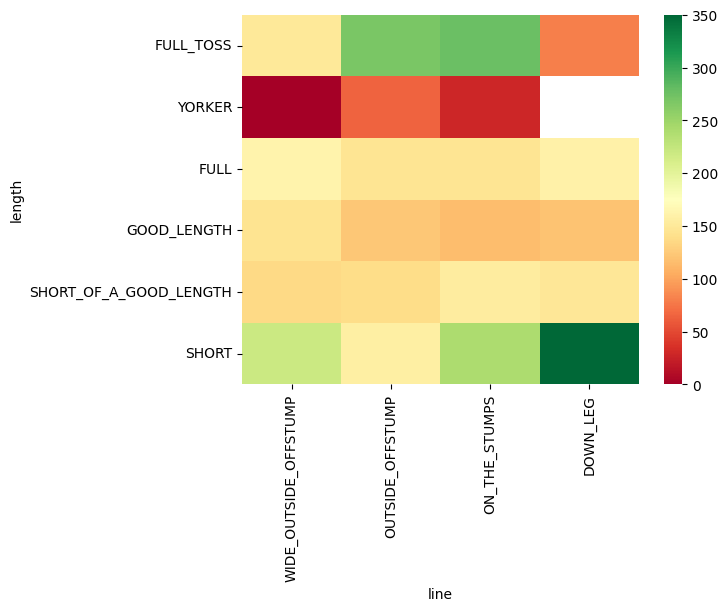

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming trans is your DataFrame or array-like data
# Replace 'trans' with your actual data
sns.heatmap(trans, cmap='RdYlGn')  # RdYlGn is a built-in colormap in Matplotlib

plt.show()

In [76]:
settingchasing.to_csv('transformed/match_innings_number.csv')